In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

font = {'size':14}
plt.rc('font', **font)

In [2]:
import numpy as np

In [3]:
# need some waveforms
# across mass-ratio and spin

In [4]:
import pycbc
from pycbc.waveform import get_fd_waveform
from pycbc.waveform import amplitude_from_frequencyseries, phase_from_frequencyseries
from pycbc import pnutils

In [5]:
import phenom

In [6]:
qlist = np.linspace(1, 5, 10)
clist = np.linspace(0, 1, 10)

In [7]:
def make_regular_2d_grid(xlist, ylist):
    x, y = np.meshgrid(xlist, ylist)
    return x.reshape(1,-1)[0], y.reshape(1,-1)[0]

def make_regular_3d_grid(xlist, ylist, zlist):
    x, y, z = np.meshgrid(xlist, ylist, zlist)
    return x.reshape(1,-1)[0], y.reshape(1,-1)[0], z.reshape(1,-1)[0]

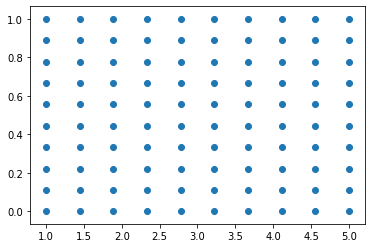

In [8]:
x, y = make_regular_2d_grid(qlist, clist)
plt.figure()
plt.scatter(x.reshape(1,-1)[0], y.reshape(1,-1)[0])

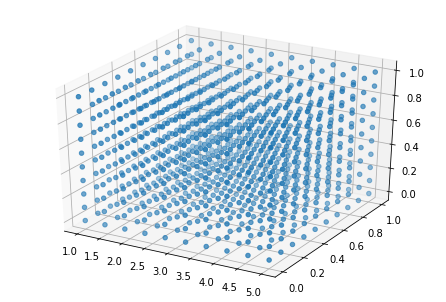

In [9]:
x, y, z = make_regular_3d_grid(qlist, clist, clist)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x.reshape(1,-1)[0], y.reshape(1,-1)[0], z.reshape(1,-1)[0])

In [10]:
def mask_array(x, y, x1, x2):
    mask = (x>=x1) & (x<=x2)
    newx = x[mask]
    newy = y[mask]
    return newx, newy

In [11]:
def make_training_set(qlist, clist, f_lower=30, delta_f=1,
                     approximant="IMRPhenomD",
                     inclination=0.,
                     mtot=100,
                     fstart=30, fend=200, align_phase=True):
    
    x, y = make_regular_2d_grid(qlist, clist)
    npts = len(x)
    
    amp = [None]*npts
    phase = [None]*npts
    
    coords = []
    
    for i, (q, c) in enumerate(zip(x,y)):
        print(i, q, c)
        coords.append([q,c])
        m1,m2 = phenom.m1_m2_M_q(mtot, q)
        hp, _ = get_fd_waveform(mass1=m1,
                                mass2=m2,
                                spin1z=c,
                                delta_f=delta_f,
                                f_lower=f_lower,
                                inclination=inclination,
                                approximant=approximant)
        amp_ts = amplitude_from_frequencyseries(hp)
        phase_ts = phase_from_frequencyseries(hp)
        
        if i==0:
            flist, amp[i] = mask_array(amp_ts.sample_frequencies, amp_ts.data, fstart, fend)
        else:
            _, amp[i] = mask_array(amp_ts.sample_frequencies, amp_ts.data, fstart, fend)
            
        _, phi_tmp = mask_array(phase_ts.sample_frequencies, phase_ts.data, fstart, fend)
        if align_phase == True:
            #aligned phase
            #subtract off a linear function over the freq interval [fstart, fend]
#             z = np.polyfit(flist[flist<100], phi_tmp[flist<100], 1)
            z = np.polyfit(flist, phi_tmp, 1)
            p = np.poly1d(z)
            phi_tmp -= p(flist)

#         _, phase[i] = mask_array(phase_ts.sample_frequencies, phase_ts.data, fstart, fend)
        phase[i] = phi_tmp
#         phase[i] = phi_tmp * phenom.eta_from_q(q)
#         phase[i] = phi_tmp / q
        
    return np.array(coords), np.array(flist), np.array(amp), np.array(phase)

In [12]:
coords, f, am, ph = make_training_set(qlist, clist, fend=200, delta_f=1)
# coords, f, am, ph = make_training_set(qlist, clist, fend=45, delta_f=0.25)
# coords, f, am, ph = make_training_set(qlist, clist, f_lower=10, fstart=10, fend=200, delta_f=0.1, approximant="IMRPhenomHM", inclination=30*np.pi/180)

0 1.0 0.0
1 1.4444444444444444 0.0
2 1.8888888888888888 0.0
3 2.333333333333333 0.0
4 2.7777777777777777 0.0
5 3.2222222222222223 0.0
6 3.6666666666666665 0.0
7 4.111111111111111 0.0
8 4.555555555555555 0.0
9 5.0 0.0
10 1.0 0.1111111111111111
11 1.4444444444444444 0.1111111111111111
12 1.8888888888888888 0.1111111111111111
13 2.333333333333333 0.1111111111111111
14 2.7777777777777777 0.1111111111111111
15 3.2222222222222223 0.1111111111111111
16 3.6666666666666665 0.1111111111111111
17 4.111111111111111 0.1111111111111111
18 4.555555555555555 0.1111111111111111
19 5.0 0.1111111111111111
20 1.0 0.2222222222222222
21 1.4444444444444444 0.2222222222222222
22 1.8888888888888888 0.2222222222222222
23 2.333333333333333 0.2222222222222222
24 2.7777777777777777 0.2222222222222222
25 3.2222222222222223 0.2222222222222222
26 3.6666666666666665 0.2222222222222222
27 4.111111111111111 0.2222222222222222
28 4.555555555555555 0.2222222222222222
29 5.0 0.2222222222222222
30 1.0 0.3333333333333333
31 

In [13]:
coords[:,0]

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ,
       1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ,
       1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ,
       1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ,
       1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ,
       1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ,
       1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ,
       1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777

In [14]:
coords[:,1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.22222222, 0.22222222, 0.22222222, 0.22222222, 0.22222222,
       0.22222222, 0.22222222, 0.22222222, 0.22222222, 0.22222222,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444,
       0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444,
       0.55555556, 0.55555556, 0.55555556, 0.55555556, 0.55555556,
       0.55555556, 0.55555556, 0.55555556, 0.55555556, 0.55555556,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.77777778, 0.77777778, 0.77777778, 0.77777778, 0.77777

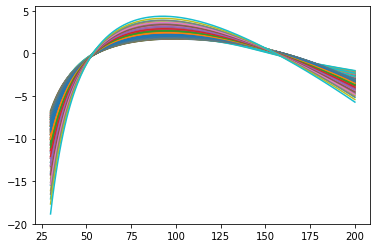

In [15]:
plt.figure()
for i in range(len(ph)):
    plt.plot(f, ph[i])

In [16]:
def compute_svd(matrix):
    u, s, vh          = np.linalg.svd(matrix, full_matrices=False)
    return u,s,vh

In [17]:
ph.shape

(100, 171)

In [18]:
u,s,vh = compute_svd(ph)
# u,s,vh = compute_svd(am)

In [19]:
print("u.shape = {0}".format(u.shape))
print("s.shape = {0}".format(s.shape))
print("vh.shape = {0}".format(vh.shape))

u.shape = (100, 100)
s.shape = (100,)
vh.shape = (100, 171)


In [20]:
s

array([3.34327228e+02, 1.10944181e+01, 5.86457188e+00, 3.04526565e+00,
       9.51521349e-01, 3.97399047e-01, 1.11037963e-01, 4.88166632e-02,
       3.52463760e-02, 2.35722252e-02, 1.33098635e-02, 7.95118058e-03,
       4.00118724e-03, 3.16706326e-03, 1.46734157e-03, 1.32564926e-03,
       1.16949815e-03, 9.43137769e-04, 5.18210300e-04, 4.47420867e-04,
       3.68248130e-04, 2.30552060e-04, 2.05455489e-04, 1.73951003e-04,
       1.26668786e-04, 1.00678248e-04, 8.72411995e-05, 7.44416666e-05,
       6.91398521e-05, 5.81658201e-05, 4.47278129e-05, 3.96239881e-05,
       3.34707802e-05, 3.14524473e-05, 2.75643382e-05, 2.51470055e-05,
       2.24313131e-05, 2.03310297e-05, 1.68078240e-05, 1.62757534e-05,
       1.46593623e-05, 1.28963069e-05, 1.11558808e-05, 1.06980240e-05,
       9.89831760e-06, 9.25301829e-06, 8.40551719e-06, 7.33264203e-06,
       6.95392352e-06, 6.51155242e-06, 5.47803295e-06, 4.56279283e-06,
       4.21640486e-06, 3.99955248e-06, 3.45493423e-06, 3.28678703e-06,
      

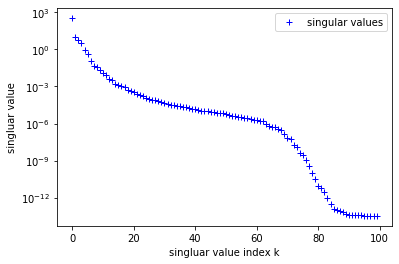

In [21]:
# From the above discussion, faster decaying singular values means the matrix/model is easier
# to compress
# plt.semilogy(range(len(ph)),s,'b+', label='singular values')
plt.semilogy(range(len(s)),s,'b+', label='singular values')
plt.ylabel('singluar value')
plt.xlabel('singluar value index k')
plt.legend(loc='best')

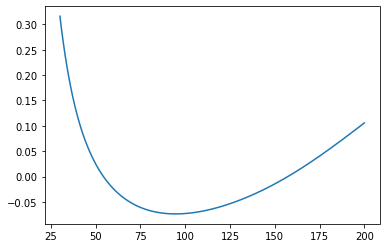

In [22]:
plt.plot(f, vh[0])

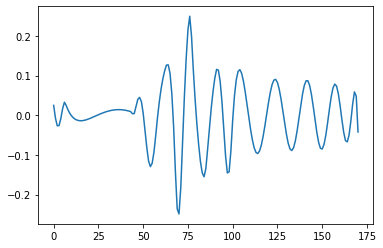

In [23]:
plt.plot(vh[20])

In [24]:
# Decide on how many column vectors to use as the basis

# for 2D aligned-spin and 22 mode only
basis_size = 5

# basis_size = 20
# basis_size = 30
# basis_size = 40



# basis_size = 3
# basis_size = 4
# basis_size = 6
# basis_size = 7
# More vectors -> more accuracy but also more computational cost 
# basis_size = -1
basis_set  = vh[0:basis_size,:]

In [25]:
def compute_projection_coeffs(RB, ref_data):
    proj_coeffs = np.array([ np.dot(RB, ref_data[i]) for i in range(len(ref_data)) ] )
    return proj_coeffs

In [26]:
proj_coeffs = compute_projection_coeffs(basis_set, ph)

In [27]:
proj_coeffs.shape

(100, 5)

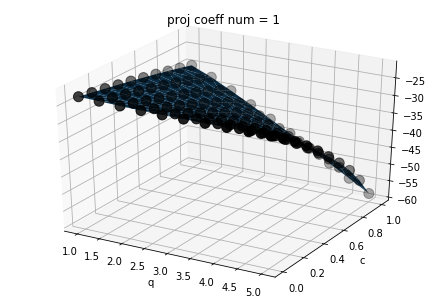

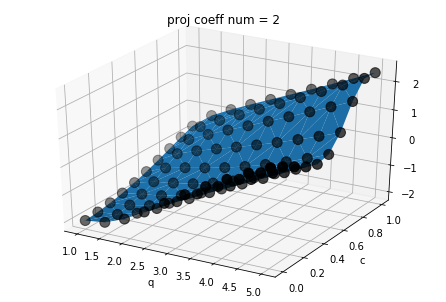

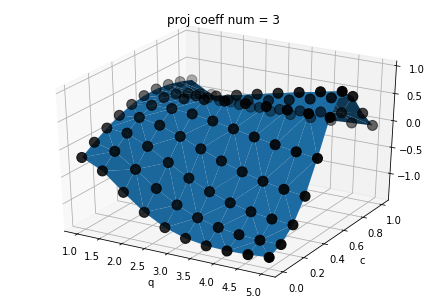

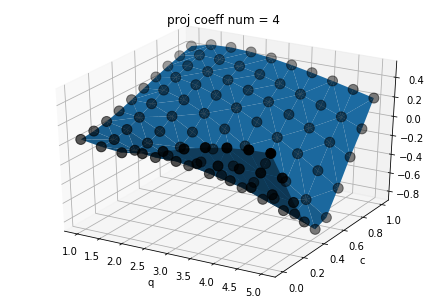

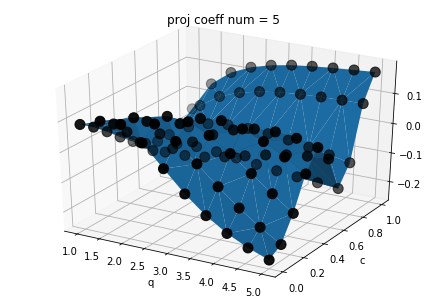

In [28]:
for i in range(basis_size):
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.plot_trisurf(coords[:,0], coords[:,1], proj_coeffs[:,i])
    ax.scatter(coords[:,0], coords[:,1], proj_coeffs[:,i], s=100, c='k')
    ax.set_xlabel('q')
    ax.set_ylabel('c')
    ax.set_title('proj coeff num = {0}'.format(i+1))
    plt.show()
    plt.close()

In [29]:
def test_reduced_basis(flist, ref_data, idx, coords, RB):
    ref_data=ref_data[idx]
    # compute projection coefficient
    proj_coeffs = np.dot(RB, ref_data)
    # compute representation in linear space defined by the span of the basis set
    approx_data = np.dot(proj_coeffs, RB)
#     approx_data = approx_data.transpose()
    
    fig, axes = plt.subplots(1,2, figsize=(14,6))
    fig.suptitle('idx = {0}, q = {1:.3f}, c = {2:.3f}'.format(idx, coords[idx][0], coords[idx][1]), fontsize=12)

    axes[0].plot(flist, ref_data, label='ref data')
    axes[0].plot(flist, approx_data, label='approx data', ls='--')
    axes[0].legend()
    
    err = np.abs(ref_data - approx_data)
    axes[1].plot(flist, err, label='err')
    axes[1].set_yscale('log')
    axes[1].legend()
    
    plt.show()
    plt.close()

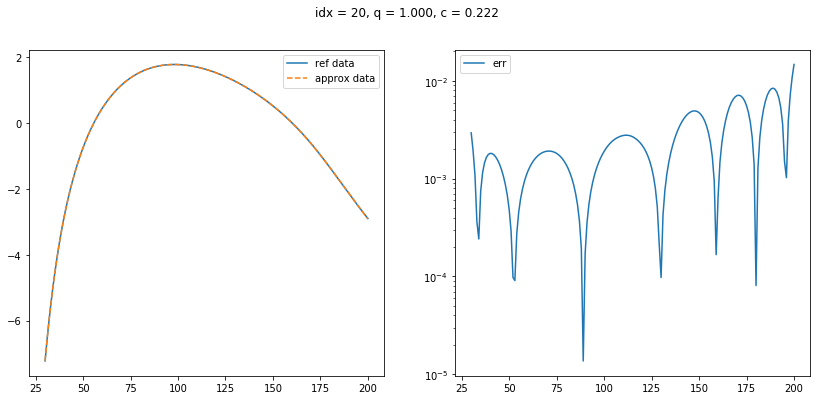

In [30]:
test_reduced_basis(f, ph, 20, coords, basis_set)

In [31]:
# for i in range(len(ph)):
#     test_reduced_basis(f, ph, i, coords, basis_set)

# try sklearn Polynomial interpolation

In [32]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

In [33]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet, Lars, LassoLars, BayesianRidge, Perceptron
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# fit using sklearn all coeffs

In [34]:
from sklearn.model_selection import GridSearchCV
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

def fit_all_proj_coeffs(coords, proj_coeffs, coeff_index):
    print(f"working {coeff_index}")
    x = coords
    y = proj_coeffs[:, coeff_index]
    
    degree = 8
#     degree = 13
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept=False))
    model.fit(x, y)
    yhat = model.predict(coords)

#     param_grid = {'polynomialfeatures__degree': np.arange(21),
#                   'linearregression__fit_intercept': [True, False],
#                   'linearregression__normalize': [True, False]}
#     param_grid = {'polynomialfeatures__degree': np.arange(21)}

#     grid = GridSearchCV(PolynomialRegression(), param_grid, cv=20)

#     grid.fit(x, y)
#     print(grid.best_params_)
#     model = grid.best_estimator_
#     yhat = model.predict(coords)
    
    
    fig, axes = plt.subplots(1,2, figsize=(10,4))
    axes[0].scatter(coords[:,0], (yhat - y)/yhat * 100, label='sklearn')
    axes[1].scatter(coords[:,0], (yhat - y), label='sklearn')
    axes[0].set_title(f"idx:{coeff_index} \n % error")
    axes[1].set_title(f"idx:{coeff_index} \n abs error")
    plt.legend()
    plt.show()
    plt.close()
    
    return model

working 0


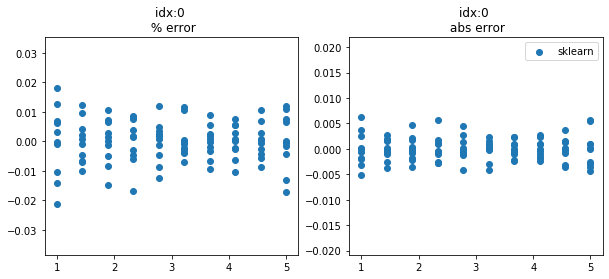

In [35]:
sk_models = []
ncoeffs = proj_coeffs.shape[1]
sk_models.append(fit_all_proj_coeffs(coords, proj_coeffs, 0))

working 0


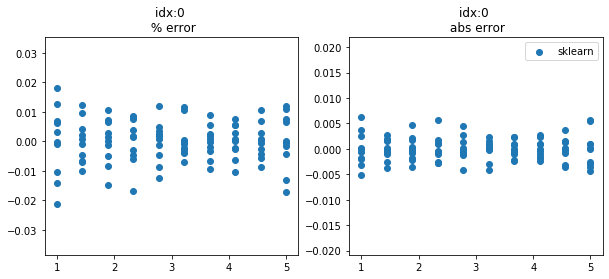

working 1


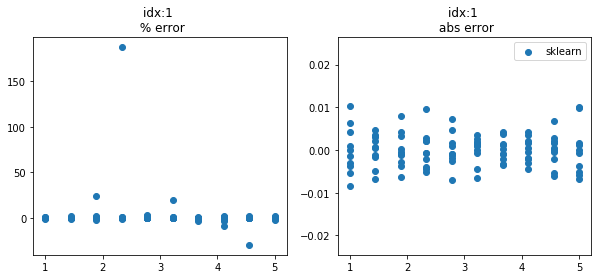

working 2


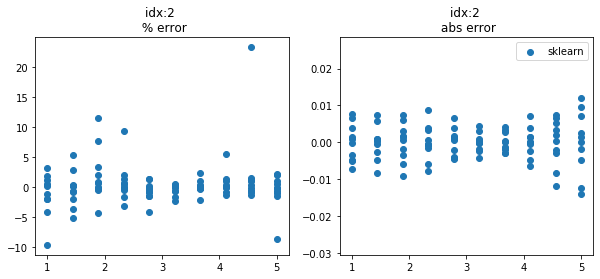

working 3


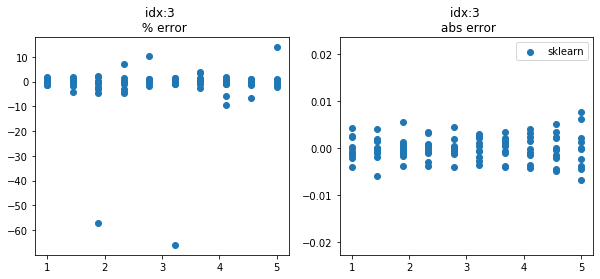

working 4


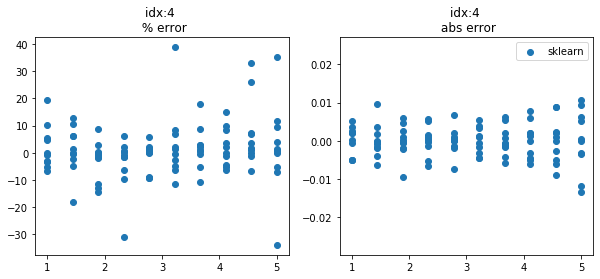

In [36]:
sk_models = []
ncoeffs = proj_coeffs.shape[1]
for i in range(ncoeffs):
    sk_models.append(fit_all_proj_coeffs(coords, proj_coeffs, i))

In [37]:
sk_models[0].predict([[1,0]])[0]

-22.897261143629052

In [38]:
def RB_model(q, chi, sk_models):
    p = [q, chi]
    RBs = [sk_models[i].predict([p])[0] for i in range(len(sk_models))]
    return np.array(RBs)

In [39]:
RB_model(1, 0, sk_models)

array([-22.89726114,  -1.99334537,  -0.17006238,   0.04403415,
         0.08696925])

In [40]:
proj_coeffs[0]

array([-22.89730008,  -1.99341253,  -0.16992495,   0.04408639,
         0.08688868])

In [41]:
RB_model(*coords[0], sk_models)

array([-22.89726114,  -1.99334537,  -0.17006238,   0.04403415,
         0.08696925])

In [42]:
def test_reduced_basis_and_model(flist, ref_data, idx, coords, RB, sk_models):
    ref_data=ref_data[idx]
    # compute projection coefficient
    proj_coeffs = np.dot(RB, ref_data)
    # compute representation in linear space defined by the span of the basis set
    approx_data = np.dot(proj_coeffs, RB)
#     approx_data = approx_data.transpose()


    model_proj_coeffs = RB_model(coords[idx][0], coords[idx][1], sk_models)
    model_data = np.dot(model_proj_coeffs, RB)
    
    fig, axes = plt.subplots(1,2, figsize=(14,6))
    fig.suptitle('idx = {0}, q = {1:.3f}, c = {2:.3f}'.format(idx, coords[idx][0], coords[idx][1]), fontsize=12)

    axes[0].plot(flist, ref_data, label='ref data', lw=3)
    axes[0].plot(flist, approx_data, label='approx data', ls='--', lw=3)
    axes[0].plot(flist, model_data, label='model data', ls='-.', lw=3)
    axes[0].legend()
    
    err = np.abs(ref_data - approx_data)
    model_err = np.abs(ref_data - model_data)
    axes[1].plot(flist, err, label='err')
    axes[1].plot(flist, model_err, label='model err')
    axes[1].set_yscale('log')
    axes[1].set_xscale('log')
    axes[1].legend()
    
    plt.show()
    plt.close()

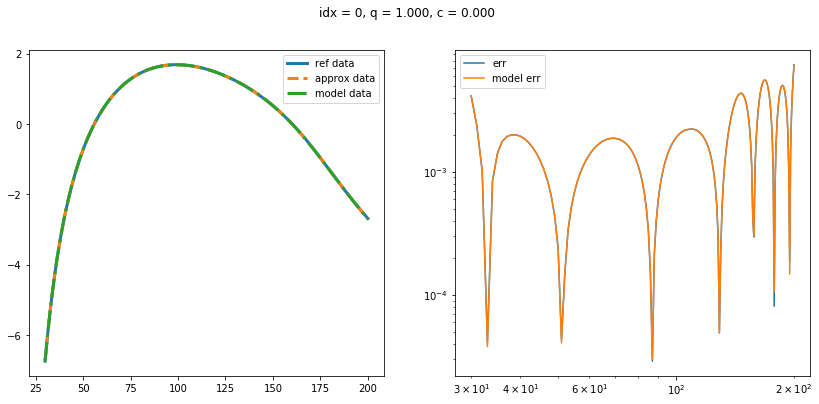

In [43]:
test_reduced_basis_and_model(f, ph, 0, coords, basis_set, sk_models)

In [44]:
# for i in range(len(ph)):
#     test_reduced_basis_and_model(f, ph, i, coords, basis_set, sk_models)